# Create a population of neurons and connect them.

In [1]:
import nest
import pylab
import random
import pprint
pp = pprint.PrettyPrinter(indent=2)


nest.ResetKernel()

#params = {"I_e": 200.0, "tau_m": 20.0}
#neuronPopulation = nest.Create("iaf_psc_alpha", 100, params=params)


**Population of neurons with randomized parameters.**
(here I tried to avoid the SetStatus function after creation)

In [2]:
randrange = random.randrange
totalNeurons = 5

electrocute = lambda : randrange(0,9,1) == 5 

def create_random_parameters(neuron_count):
    return list(
    map(
        lambda x: ({
            "I_e": randrange(190, 210, 1) * 1.0 if electrocute() else 0.0, 
            #"tau_m": randrange(19, 21) * 1.0
            }
        ), 
        range(0, neuron_count)
    )
)

params_list = create_random_parameters(totalNeurons)

pp.pprint(params_list)

pop1 = nest.Create(
    "iaf_psc_alpha", 
    totalNeurons, 
    params_list
)

params_list2 = create_random_parameters(totalNeurons)

pop2 = nest.Create(
    "iaf_psc_alpha", 
    totalNeurons, 
    params_list2
)

print(pop1, pop2)

[{'I_e': 199.0}, {'I_e': 203.0}, {'I_e': 0.0}, {'I_e': 0.0}, {'I_e': 0.0}]
(1, 2, 3, 4, 5) (6, 7, 8, 9, 10)


**Connect Neurons in a random fashion.**


In [3]:
d = 1.0
Je = 2.0
Ke = 20
Ji = -4.0
Ki = 12
conn_dict_ex = {"rule": "fixed_indegree", "indegree": Ke}
conn_dict_in = {"rule": "fixed_indegree", "indegree": Ki}
syn_dict_ex = {"delay": d, "weight": Je}
syn_dict_in = {"delay": d, "weight": Ji}
nest.Connect(pop1, pop2, conn_dict_ex, syn_dict_ex)
nest.Connect(pop2, pop1, conn_dict_in, syn_dict_in)


**Connect a multimeter to some neurons**

In [4]:
multimeter = nest.Create("multimeter", params={"withtime": True, "record_from": ["V_m"]})
nest.Connect(multimeter, pop1)

**Run Simulation**

In [5]:
nest.Simulate(50.0)

**Recover data from simulation and plot.**

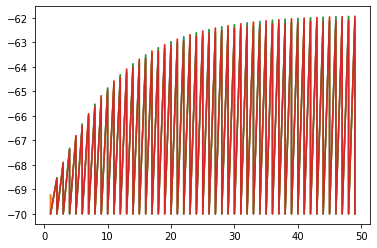

In [6]:
pylab.figure(1)
dmm = nest.GetStatus(multimeter)[0]

for index in range(0, totalNeurons-1):
    Vms = dmm["events"]["V_m"][index::2]
    ts = dmm["events"]["times"][index::2]
    pylab.plot(ts, Vms)

pylab.show()